In [1]:
hmargs = {
    'aprx': 'paca',
    'basis': 'linear',
    'admis': '2',
    'eta': 1.2,
    'm': 4,
    'clf': 32,
    'eps_aca': 1e-2,     
    'q_reg': 2,
    'q_sing': 4,
}
refn = 9
freqs = 0, 50e6, 1e6
c = 1500
rho = 1000

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
from numpy.linalg import norm
from cnld.h2lib import matrixnorms

from cnld import abstract, fem, bem, mesh
from cnld.arrays import matrix_array
from cnld.compressed_formats import MbkSparseMatrix

array = matrix_array(nelem=[1,1], shape='circle')
fs = np.arange(freqs[0], freqs[1] + freqs[2], freqs[2])

amesh = mesh.Mesh.from_abstract(array, refn)
ob = amesh.on_boundary
F = np.array(fem.array_f_spmatrix(array, refn).todense())
b = np.sum(F, axis=1)

nrmse = np.zeros(len(fs))

for i, f in enumerate(tqdm(fs)):
    
    omg = 2 * np.pi * f
    k = omg / c
    
    Zfm = bem.array_z_matrix(array, refn, k, format='FullFormat', **hmargs)
    Zhm = bem.array_z_matrix(array, refn, k, format='HFormat', **hmargs)
    
    err = matrixnorms.norm2diff_amatrix_hmatrix(Zhm._mat, Zfm._mat) / norm(Zfm.data)
    nrmse[i] = err
    
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(fs / 1e6, nrmse)


100%|██████████| 11/11 [00:30<00:00,  2.74s/it]


100%|██████████| 2/2 [00:15<00:00,  7.97s/it]


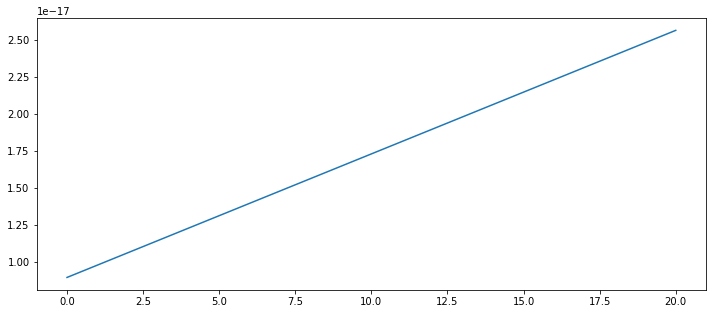

In [15]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
from numpy.linalg import norm
from cnld.h2lib import matrixnorms

from cnld import abstract, fem, bem, mesh
from cnld.arrays import matrix_array
from cnld.compressed_formats import MbkSparseMatrix

array = matrix_array(nelem=[1,2], shape='square')
fs = np.arange(freqs[0], freqs[1] + freqs[2], freqs[2])

amesh = mesh.Mesh.from_abstract(array, refn)
ob = amesh.on_boundary
F = np.array(fem.array_f_spmatrix(array, refn).todense())
b = np.sum(F, axis=1)

nrmse = np.zeros(len(fs))
xfm_mean = np.zeros(len(fs))
xhm_mean = np.zeros(len(fs))

for i, f in enumerate(tqdm(fs)):
    
    omg = 2 * np.pi * f
    k = omg / c
    
    Gfe = fem.array_mbk_spmatrix(array, refn, f)
    Zfm = bem.array_z_matrix(array, refn, k, format='FullFormat', **hmargs)
    Zhm = bem.array_z_matrix(array, refn, k, format='HFormat', **hmargs)
    Zhm.eps_add = 1e-12
    
    Gfm = MbkSparseMatrix(Gfe) + -omg**2 * 2 * rho * Zfm
    Ghm = MbkSparseMatrix(Gfe) + -omg**2 * 2 * rho * Zhm
    
    err = matrixnorms.norm2diff_amatrix_hmatrix(Ghm._mat, Gfm._mat) / norm(Gfm.data)
    nrmse[i] = err

fig, ax = plt.subplots(figsize=(12,5))
ax.plot(fs / 1e6, nrmse)

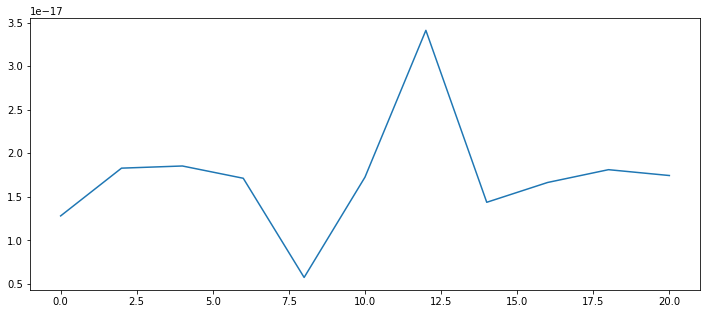

In [3]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(fs / 1e6, nrmse)

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
from numpy.linalg import norm
from cnld.h2lib import matrixnorms

from cnld import abstract, fem, bem, mesh
from cnld.arrays import matrix_array
from cnld.compressed_formats import MbkSparseMatrix

array = matrix_array(nelem=[1,4], shape='circle')
fs = np.arange(freqs[0], freqs[1] + freqs[2], freqs[2])

amesh = mesh.Mesh.from_abstract(array, refn)
ob = amesh.on_boundary
F = np.array(fem.array_f_spmatrix(array, refn).todense())
b = np.sum(F, axis=1)

nrmse = np.zeros(len(fs))
xfm_mean = np.zeros(len(fs))
xhm_mean = np.zeros(len(fs))

for i, f in enumerate(tqdm(fs)):
    
    omg = 2 * np.pi * f
    k = omg / c
    
    Gfe = fem.array_mbk_spmatrix(array, refn, f)
    Zfm = bem.array_z_matrix(array, refn, k, format='FullFormat', **hmargs)
    Zhm = bem.array_z_matrix(array, refn, k, format='HFormat', **hmargs)
    
    Gfm = MbkSparseMatrix(Gfe) + -omg**2 * 2 * rho * Zfm
    Ghm = MbkSparseMatrix(Gfe) + -omg**2 * 2 * rho * Zhm
    Gfm.eps_lu = eps_lu
    Ghm.eps_lu = eps_lu
    
    xfm = np.conj(Gfm.lu().lusolve(b))
    xfm[ob] = 0
    xhm = np.conj(Ghm.lu().lusolve(b))
    xhm[ob] = 0
    
    xfm_mean[i] = np.mean(np.abs(xfm))
    xhm_mean[i] = np.mean(np.abs(xhm))
    nrmse[i] = norm(xfm - xhm) / norm(xfm)

    
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(fs / 1e6, nrmse)

fig, ax = plt.subplots(figsize=(12,5))
ax.plot(fs / 1e6, xfm_mean)
ax.plot(fs / 1e6, xhm_mean)

100%|██████████| 51/51 [16:07<00:00, 18.99s/it]


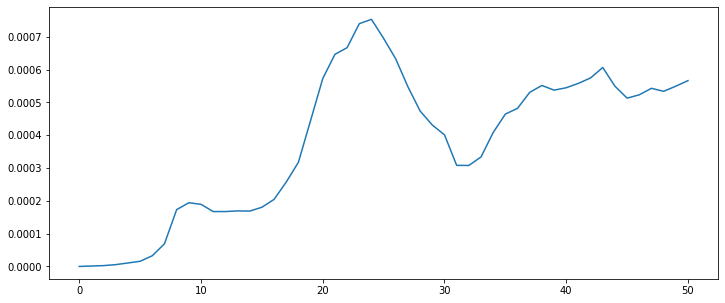

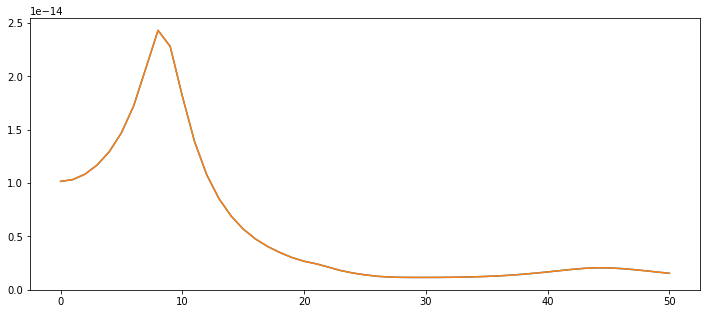

In [3]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(fs / 1e6, nrmse)

fig, ax = plt.subplots(figsize=(12,5))
ax.plot(fs / 1e6, xfm_mean)
ax.plot(fs / 1e6, xhm_mean)